## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import random
from scipy.stats import sem
from sklearn import datasets
import sklearn.datasets as dta
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [4]:
# Drop any duplicate rows
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
cleaned_df["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

regimen_group = cleaned_df.groupby(["Drug Regimen"])

tumors_series = regimen_group["Tumor Volume (mm3)"]

mean_tumor = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),2)
median_tumor = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),2)
var_tumor = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),2)
sd_tumor = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),2)
sem = round(cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(),2)

In [7]:
new_df = pd.concat([mean_tumor, median_tumor, var_tumor, sd_tumor, sem], axis=1)

cols = []
count = 1
for column in new_df.columns:
    if column == "Tumor Volume (mm3)":
        cols.append(f"Tumor Volume (mm3)_{count}")
        count+=1
        continue
    cols.append(column)
new_df.columns = cols

renamed_df = new_df.rename(columns={
    "Tumor Volume (mm3)_1":"Mean", 
    "Tumor Volume (mm3)_2":"Median", 
    "Tumor Volume (mm3)_3": "Variance",
    "Tumor Volume (mm3)_4": "Std Dev",
    "Tumor Volume (mm3)_5": "SEM"})

renamed_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

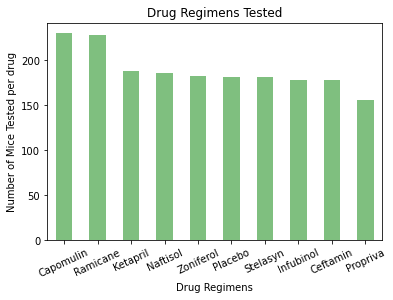

In [20]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

drug_regimens = cleaned_df["Drug Regimen"].value_counts()
drug_regimens.plot(kind="bar", color='g', alpha=0.5, align='center')

plt.xticks(rotation=25)
plt.title("Drug Regimens Tested")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested per drug")

plt.savefig('Drugs_Tested_Bar_Chart.png')

plt.show()

Text(0, 0.5, 'Number of Mice Tested per drug')

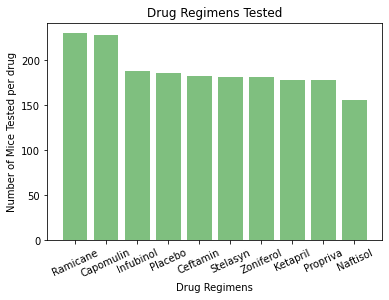

In [9]:
# Generate identical bar plot using pyplot instead of pandas.
drug_regimens = cleaned_df["Drug Regimen"].value_counts()
x_axis = cleaned_df["Drug Regimen"].unique()

plt.bar(x_axis, drug_regimens, color='g', alpha=0.5, align='center')

plt.xticks(rotation=25)
plt.title("Drug Regimens Tested")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested per drug")

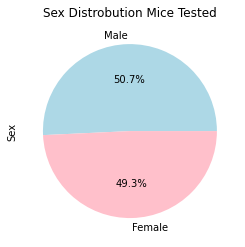

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data = cleaned_df["Sex"].value_counts()
labels = cleaned_df["Sex"].unique()
colors = ["lightblue", "Pink"]

data.plot(kind="pie", labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex Distrobution Mice Tested")

plt.savefig('Sex_Distrobution_Mice_Tested_Pie_Chart.png')

plt.show()

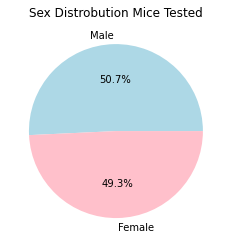

In [11]:
# Generate identical pie plot using pyplot

data = cleaned_df["Sex"].value_counts()
labels = cleaned_df["Sex"].unique()
colors = ["lightblue", "Pink"]

plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex Distrobution Mice Tested")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_group = cleaned_df.groupby("Mouse ID")
max_timepoint = mouse_group["Timepoint"].max()

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = max_timepoint.to_frame().reset_index()

# HINT: Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_df = pd.merge(max_timepoint_df, cleaned_df, on=["Mouse ID","Timepoint"])[["Drug Regimen", "Tumor Volume (mm3)"]]
new_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Placebo,70.717621
3,Ceftamin,62.999356
4,Stelasyn,63.440686
...,...,...
244,Propriva,48.710661
245,Ramicane,30.638696
246,Infubinol,62.754451
247,Naftisol,65.741070


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen for Tumor Volume
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Infubinol = new_df.loc[new_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
# Infubinol

# quartiles = Infubinol.quantile([.25,.5,.75])

# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# lower_bound = round(lowerq - (1.5*iqr))
# upper_bound = round(upperq + (1.5*iqr))

# print(f"The lower quartile of DATA is: {lowerq}")
# print(f"The upper quartile of DATA is: {upperq}")
# print(f"The interquartile range of DATA is: {iqr}")
# print(f"The the median of DATA is: {quartiles[0.5]} ")
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")


# One method to do this is the following, but you can use whatever method works for you.
##############################################################################
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
vol_drug = []

for drug in drug_list:
    volume_drug = new_df.loc[new_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    quartiles = volume_drug.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq ,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    vol_drug.append(volume_drug)
    
    print(f"{drug}")
    print(f"-----------------------")
    print(f"• lower quartile: {lowerq}")
    print(f"• upper quartile: {upperq}")
    print(f"• interquartile: {iqr}")
    print(f"• Values below {lower_bound} could be outliers.")
    print(f"• Values above {upper_bound} could be outliers.")
    print(f"-----------------------")

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
      
    # Determine outliers using upper and lower bounds



Capomulin
-----------------------
• lower quartile: 32.38
• upper quartile: 40.16
• interquartile: 7.78
• Values below 20.71 could be outliers.
• Values above 51.83 could be outliers.
-----------------------
Ramicane
-----------------------
• lower quartile: 31.56
• upper quartile: 40.66
• interquartile: 9.1
• Values below 17.91 could be outliers.
• Values above 54.31 could be outliers.
-----------------------
Infubinol
-----------------------
• lower quartile: 54.05
• upper quartile: 65.53
• interquartile: 11.48
• Values below 36.83 could be outliers.
• Values above 82.75 could be outliers.
-----------------------
Ceftamin
-----------------------
• lower quartile: 48.72
• upper quartile: 64.3
• interquartile: 15.58
• Values below 25.35 could be outliers.
• Values above 87.67 could be outliers.
-----------------------


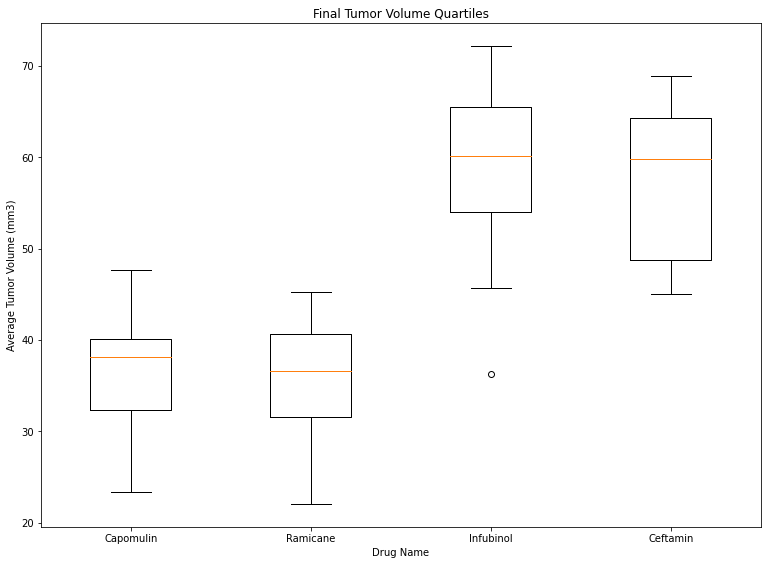

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(vol_drug, labels = drug_list)
plt.title("Final Tumor Volume Quartiles")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Drug Name")

plt.savefig('Final_Tumor_Volume_Quartiles_Box_Chart.png')

plt.show()


## Line and Scatter Plots

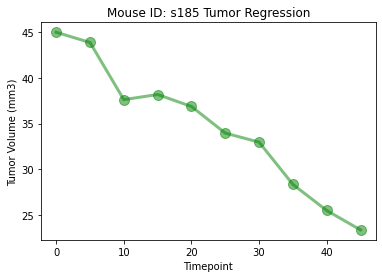

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

mouse_id_capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]["Mouse ID"]
mouse_id_capomulin = mouse_id_capomulin[10]

new_df = cleaned_df.loc[cleaned_df["Mouse ID"] == mouse_id_capomulin]

timpoint = new_df["Timepoint"]
tumor = new_df["Tumor Volume (mm3)"]
               
plt.plot(timpoint, tumor, marker = "o", color = "green", alpha = 0.5, markersize=10, linewidth=3)
plt.title("Mouse ID: " + mouse_id_capomulin + " Tumor Regression")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('Mouse ID_Tumor_Regression.png')

plt.show()

In [17]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Text(0, 0.5, 'Average Tumor Volume (mm3)')

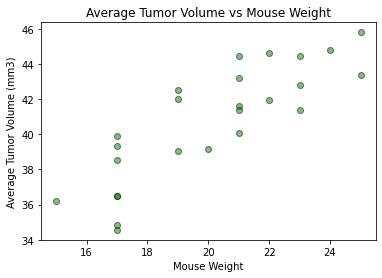

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

capo_tumor_vol = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"][["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]

mouse_group_df = capo_tumor_vol.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

x_axis = mouse_group_df["Weight (g)"]
y_axis = mouse_group_df["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.5)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

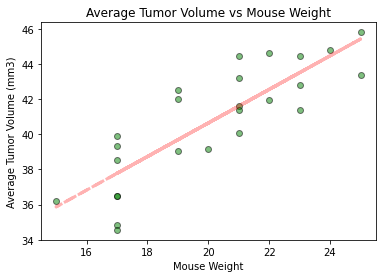

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = mouse_group_df["Weight (g)"]
y_axis = mouse_group_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.5)
plt.plot(x_axis,regress_values,"r-", alpha=.3, linestyle='dashed', linewidth=3)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig('AverageTumorVolume_scatter.png')
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(sts.pearsonr(x_axis,y_axis)[0],2)}")


# Observations and Insights

##### Observations:

1. The Drug Regimen Ramicane produced the smallest average tumor sizes overall (40.22)
2. The Drug Regimen Ketapril produced the largest average tumor sizes overall (55.24)
3. The Drug Ketapril also had the highest variance of results (68.55)
4. Infubinol had one giant outlier in the quartile box plot data
5. For Capomulin, the longer the mouse was on the drug - the more the tumor was reduced
6. There is a corelation to the size in volume to the weight of the mouse - the bigger the mouse, the bigger the tumor.